In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [2]:
# Charger le modèle VGG16 pré-entraîné
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

In [3]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
    vgg16_feature = model.predict(img_data)
    return vgg16_feature

In [4]:
def show_images(images):
    # Ensure the image file exists before trying to display it
    for image_path in images:
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            return
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.axis('off')  # Turn off the axis
        plt.show()


In [5]:
chemin_dossier = './otherdata2/'

contenu_dossier = os.listdir(chemin_dossier)

content = []

for element in contenu_dossier:
    content.append(element)

random_images = random.sample(content, 10)
image_database = [chemin_dossier + image for image in random_images]
image_database

['./otherdata2/Sheer-Paneled_Jersey_Tee_img_00000046.jpg',
 './otherdata2/Mineral_Wash_Skinny_Jeans_img_00000027.jpg',
 './otherdata2/Open-Knit_High-Slit_Maxi_Dress_img_00000050.jpg',
 './otherdata2/Open-Mesh_Midi_Dress_img_00000036.jpg',
 './otherdata2/1981_Graphic_Ringer_Tee_img_00000011.jpg',
 './otherdata2/Mineral_Wash_Pencil_Skirt_img_00000017.jpg',
 './otherdata2/Sheer-Paneled_Jersey_Tee_img_00000025.jpg',
 './otherdata2/Mixed_Paisley_Print_Maxi_Skirt_img_00000011.jpg',
 './otherdata2/Sheer_Pleated-Front_Blouse_img_00000086.jpg',
 './otherdata2/1981_Graphic_Ringer_Tee_img_00000019.jpg']

In [41]:
def get_similar_images(paths, goal, limite):
    similarities = [0 for i in range(len(paths))]
    i = 0
    base_model = VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    new_image_features = extract_features(goal, model)
    for path in paths:
        feature = extract_features(path, model)
        similarity = cosine_similarity(new_image_features, feature).tolist()[0][0]
        similarity = round(similarity, 4)
        print(f"Similarité  : {similarity}")
        similarities[i] = similarity
        name = str(similarity).replace("0.", "")
        shutil.copy2(path, "./runs/find/" + name + '.jpg')
        i += 1
    indices = np.argsort(similarities)[::-1][:limite]
    new_paths = [[paths[i], similarities[i]] for i in indices]
    return new_paths

In [42]:
new_paths = get_similar_images(image_database, './otherdata2/1981_Graphic_Ringer_Tee_img_00000037.jpg', 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Similarité  : 0.3748
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Similarité  : 0.3848
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Similarité  : 0.4043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Similarité  : 0.5589
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Similarité  : 0.5202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Similarité  : 0.389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Similarité  : 0.5437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Similarité  : 0.4279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Similarité  : 0.494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Similarité  : 0.5886


In [46]:
for index, img_path in enumerate(new_paths):
    print(f"Image {index + 1} : {img_path[0]} avec un score de similarité de {img_path[1]}")

Image 1 : ./otherdata2/1981_Graphic_Ringer_Tee_img_00000019.jpg avec un score de similarité de 0.5886
Image 2 : ./otherdata2/Open-Mesh_Midi_Dress_img_00000036.jpg avec un score de similarité de 0.5589
Image 3 : ./otherdata2/Sheer-Paneled_Jersey_Tee_img_00000025.jpg avec un score de similarité de 0.5437
Image 4 : ./otherdata2/1981_Graphic_Ringer_Tee_img_00000011.jpg avec un score de similarité de 0.5202
Image 5 : ./otherdata2/Sheer_Pleated-Front_Blouse_img_00000086.jpg avec un score de similarité de 0.494


In [25]:
# Extraire les caractéristiques des images dans la base de données
database_features = [extract_features(img_path, model) for img_path in image_database]

# Extraire les caractéristiques de la nouvelle image
new_image_path = './otherdata2/1981_Graphic_Ringer_Tee_img_00000037.jpg'
print(f"La nouvelle image est : {new_image_path}")
new_image_features = extract_features(new_image_path, model)

# Calculer la similarité entre la nouvelle image et les images de la base de données
similarities = cosine_similarity(new_image_features, np.array(database_features).squeeze())

# Afficher les scores de similarité pour chaque image dans la base de données
for idx, score in enumerate(similarities[0]):
    print(f"Score de similarité avec {image_database[idx]} : {score:.4f}")


most_similar_image_index = np.argmax(similarities)
most_similar_image_path = image_database[most_similar_image_index]

print(f"L'image la plus similaire est : {most_similar_image_path}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
La nouvelle image est : ./otherdata2/1981_Graphic_Ringer_Tee_img_00000037.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Score de similarité avec ./otherdata2/Sheer-Paneled_Jersey_Tee_img_00000046.jpg : 0.3748
Score de similarité avec ./otherdata2/Mineral_Wash_Skinny_Jeans_img_00000027.jpg : 0.3848
Score de similarité avec ./otherdata2/Open-Knit_High-Slit_Maxi_Dress_img_00000050.jpg : 0.4043
Score de similarité avec ./otherdata2/Open-Mesh_Midi_Dress_img_00000036.jpg : 0.5589
Score de similarité avec ./otherdata2/1981_Graphic_Ringer_Tee_img_00000011.jpg : 0.5202
Score de similarité avec ./otherdata2/Mineral_Wash_Penci

Nouvelle image


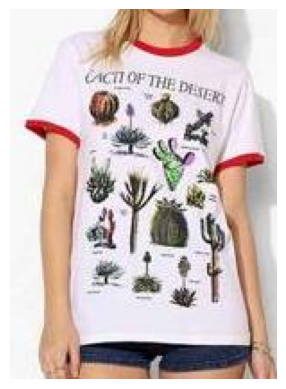



Base des images


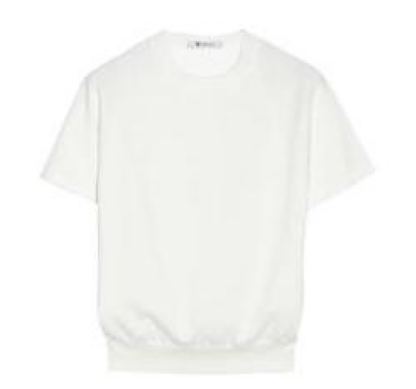

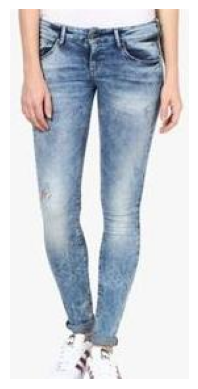

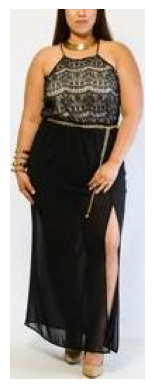

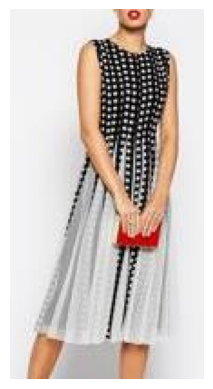

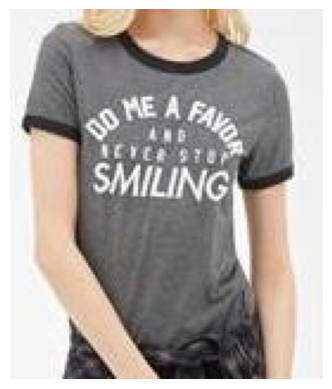

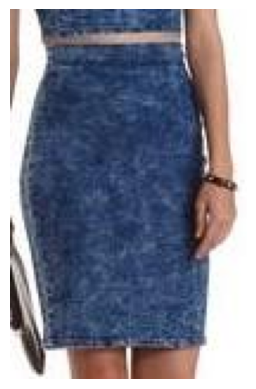

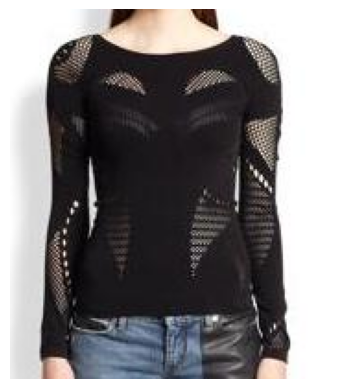

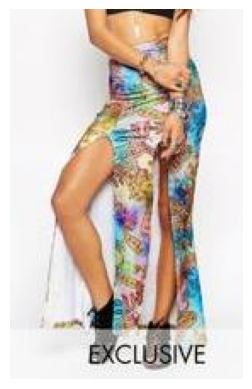

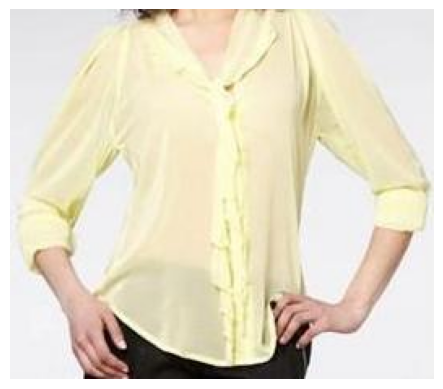

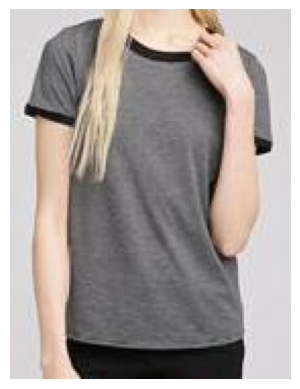



Image la plus similaire


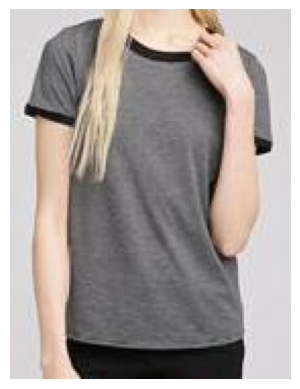

In [26]:
print("Nouvelle image")
show_images([new_image_path])
print("\n")
print("Base des images")
show_images(image_database)
print("\n")
print("Image la plus similaire")
show_images([most_similar_image_path])